11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.7602 - loss: 0.7319 - val_accuracy: 0.9812 - val_loss: 0.0617
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9483 - loss: 0.1748 - val_accuracy: 0.9868 - val_loss: 0.0468
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9611 - loss: 0.1272 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9679 - loss: 0.1042 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9750 - loss: 0.0852 - val_accuracy: 0.9908 - val_loss: 0.0346
✅ Test accuracy: 0.9888


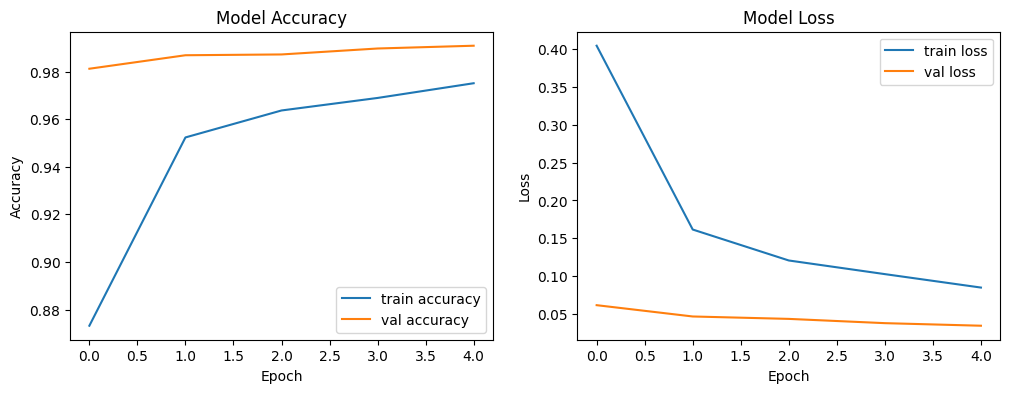

In [1]:
# Filename: mnist_cnn.py
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f" Test accuracy: {test_acc:.4f}")

# 6. Plot accuracy/loss curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


